In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
# import sympy
import scipy.stats as st
import scipy.special
import pandas
import csv
import math
import multiprocessing as mp
import datetime
from decimal import *
from mpl_toolkits.mplot3d import Axes3D
# from google.colab import drive

## **Google Drive**

In [23]:
# connect to google drive to save the csv file
# drive.mount('drive')
# os.chdir("drive/My Drive/Yen-Ting Lin/Code")

## **Back-off Calculation**

### **Retransmission at same RAP**

In [11]:
# alpha with i
def find_kmin(T_RAREP, T_RAR, W_RAR, W_BO, i):
  return np.ceil((i - 1) + ((1 - (T_RAR + W_RAR + W_BO)) / T_RAREP))
  # return np.ceil((i - 1) - (((T_RAR + W_RAR + W_BO) - 1) / T_RAREP)) # same equation

def find_kmax(T_RAREP, T_RAR, W_RAR, W_BO, i):
  return np.floor(i - ((T_RAR + W_RAR + 1) / T_RAREP))

def find_alpha(T_RAREP, T_RAR, W_RAR, W_BO, i, k, kmin, kmax):
  if kmin <= k <= (i - ((T_RAR + W_RAR + W_BO) / T_RAREP)):
    return (((k - 1) * T_RAREP) + T_RAR + W_RAR + W_BO - ((i - 2) * T_RAREP)) / W_BO
  elif (i - ((T_RAR + W_RAR + W_BO) / T_RAREP)) < k < ((i - 1) - ((T_RAR + W_RAR) / T_RAREP)):
    return ((T_RAREP) / W_BO)
  elif ((i - 1) - ((T_RAR + W_RAR) / T_RAREP)) <= k <= kmax:
    return (((i - 1) * T_RAREP) - (((k - 1) * T_RAREP) + T_RAR + W_RAR)) / W_BO
  else:
    return 0

### **Retransmission of fallback RAP**

In [12]:
def find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR, W_RAR, i):
  return np.ceil((((i - 2) * T_RAREP_4sra) + T_RAR + W_RAR - 1) / T_RAREP_2sra) + 1

def find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR, W_RAR, i):
  return np.floor((((i - 1) * T_RAREP_4sra) + T_RAR + W_RAR - 2) / T_RAREP_2sra) + 1

## **Main Function**

In [21]:
def main():
  # initail number of fallback UE
  M_FB = [0.0 for i in range(0, M - 1)]

  Ms_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_4SRA_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_4SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_4SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ps_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Da_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PRACH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  Ur_PUSCH_2SRA_list = [0.0 for i in range(0, len(M_2SRA))]
  MiSn_2SRA_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_2SRA_list = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

  Ms_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ps_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Da_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PRACH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  Ur_PUSCH_FB_list = [0.0 for i in range(0, len(M_4SRA))]
  MiSn_FB_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_FB_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Ms_T_list = [0.0 for i in range(0, M - 1)]
  Ps_T_list = [0.0 for i in range(0, M - 1)]
  Da_2SRA_T_list = [0.0 for i in range(0, M - 1)]
  Da_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PRACH_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_4SRA_T_list = [0.0 for i in range(0, M - 1)]
  Ur_PUSCH_T_list = [0.0 for i in range(0, M - 1)]
  MiSn_T_list = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # MiSn_T_list = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

  Slot = [i for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  # Slot = [i for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
  Mi_FB_list = [0.0 for i in range(0, len(Slot))]
  
  j_list = [0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
  j_start = 0.0

  for ue in range(0, M - 1):
    # initial the MiSn and MiFn: Mi[slot][num of trans + 1]
    # the last time of retrans needed to be ignored
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_4SRA = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]
    T_2SRA = [0.0 for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) + 1)]

    MiCn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiSn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    MiFn_FB = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    T_FB = [0.0 for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) + 1)]
    '''
    MiCn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_4SRA = [[0.0] * int((retrans_4sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_4SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_2SRA = [[0.0] * int((retrans_2sra + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_2SRA = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    MiCn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiSn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    MiFn_FB = [[0.0] * int((retrans_FB + 1) + 1) for _ in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]
    T_FB = [0.0 for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB) + 1)]

    # num of total UE in slot 0
    MiFn_2SRA[0][0] = M_2SRA[ue]
    # print(np.matrix(MiFn))

    # 2SRA procedure sure be finished before 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      # print("i = ", i, "\n")
      kmin_2sra = find_kmin(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      kmax_2sra = find_kmax(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_2SRA = 0
      for n in range(0, int(retrans_2sra + 1)):
        m_2SRA += MiFn_2SRA[i][n] # Mi

      if N_2SRA[0] == 0:
        E_M = 0
      else:
        E_M = np.exp(-(m_2SRA / N_2SRA[0]))
        # print("i =", i, ",E_M =", E_M)

      for n in range(0, int(retrans_2sra + 1)):
        # print("n = ", n, "\n")
        k_list_2SRA = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_2SRA = math.ceil((T_RAR_2sra + W_RAR_2sra) / T_RAREP_2sra)
        # print("k_shift_2SRA", k_shift_2SRA)
        if MiFn_2SRA[i][n] != 0:
          for k in range(int(kmin_2sra), int(kmax_2sra + 1)):
            # print("k = ", k, "\n")
            alpha_2sra = find_alpha(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, i, k, kmin_2sra, kmax_2sra)
            if preamble_detection == "false":
              k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M)))
              # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - N_UL_2sra))
                elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_2SRA.append(alpha_2sra * (0))
              else:
                total_MiFn_2SRA = 0
                for n_2sra in range(0, int(retrans_2sra + 1)):
                  total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
                # print("n =", n, ",total_MiFn_2SRA =", total_MiFn_2SRA)
                # print("P_N =", P_N, ",MiFn_2SRA[i][n] * E_M * P_N =", MiFn_2SRA[i][n] * E_M * P_N)
                if total_MiFn_2SRA <= N_UL_2sra:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_2SRA.append(alpha * MiCn_2SRA[i][n])
                else:
                  k_list_2SRA.append(alpha_2sra * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra)))
                  # print("S =", (MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA)
                  # print("S' =", ((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)
                  # print("F-S' =", MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra))
                  # print("alpha*(F-S') =", alpha * (MiFn_2SRA[i][n] - (((MiFn_2SRA[i][n] * E_M * P_N) / total_MiFn_2SRA) * N_UL_2sra)))

                  # k_list_2SRA.append(alpha * (MiFn_2SRA[i][n] - MiSn_2SRA[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_2SRA", len(k_list_2SRA))
          for itr_k in range(0, len(k_list_2SRA)):
            # print("i + itr_k + k_shift_2SRA", i + itr_k + k_shift_2SRA)
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            # print(k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k])
            MiFn_2SRA[i + itr_k + k_shift_2SRA][n + 1] += k_list_2SRA[(len(k_list_2SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      # print("MiFn_2SRA", MiFn_2SRA[i])

      for n in range(0, int(retrans_2sra + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M
          MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M)
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) >= N_UL_2sra:
              MiSn_2SRA[i][n] = N_UL_2sra
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - N_UL_2sra
            elif n == 0 and MiFn_2SRA[i][n] * E_M * P_N(n + 1) < N_UL_2sra:
              MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
              MiCn_2SRA[i][n] = MiFn_2SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_2SRA[i][n] = 0
              MiCn_2SRA[i][n] = 0
          else:
            total_MiFn_2SRA = 0
            for n_2sra in range(0, int(retrans_2sra + 1)):
              # print("n_2sra", n_2sra, "MiFn_2SRA_Loop", MiFn_2SRA[i][n_2sra] * E_M * (1 - (1 / math.exp(n_2sra + 1))))
              total_MiFn_2SRA += MiFn_2SRA[i][n_2sra] * E_M * P_N(n_2sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_2SRA <= N_UL_2sra:
              MiSn_2SRA[i][n] = MiFn_2SRA[i][n] * E_M * P_N(n + 1)
            else:
              # print("MiFn_2SRA_One", MiFn_2SRA[i][n] * E_M * P_N, total_MiFn_2SRA)
              MiSn_2SRA[i][n] = ((MiFn_2SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_2SRA) * N_UL_2sra
            MiCn_2SRA[i][n] = MiFn_2SRA[i][n] - MiSn_2SRA[i][n]
        # if n == retrans_2sra:
        #   if (MiCn_2SRA[i][n]) != 0:
        #     M_FB[ue] += MiCn_2SRA[i][n]
        #     Mi_FB_list[i + 1] += MiCn_2SRA[i][n]
        #     MiFn_FB[i + 1][0] += MiCn_2SRA[i][n]
      # print("MiSn_2SRA", MiSn_2SRA[i])
      # print("--------------------------------------------------------------------")

      # define delay
      if payload_decoding == "true":
        # T_2SRA[i] = (i + 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra + T_MSG_2sra
        T_2SRA[i] = (i + 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 1 + T_MSG_2sra
      elif payload_decoding == "false":
        # T_2SRA[i] = (i + 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 9 + T_total_2sra
        T_2SRA[i] = (i + 1) * T_RAREP_2sra + T_RAR_2sra + W_RAR_2sra + 1

    # num of total UE in slot 0
    MiFn_4SRA[0][0] = M_4SRA[ue]
    # sum all the failed 2SRA UE to become total number of M_FB
    '''
    if T_RAREP_4sra < T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        # if (MiCn_2SRA[i][3]) != 0: -> cannot use this condition, it will make error
        M_FB[ue] += MiCn_2SRA[i][3]
        # print(M_FB[ue], MiCn_2SRA[i])
        # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
        jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i - 1, jmax, jmin)
        if jmax == jmin:
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
        # print(MiFn_FB[i])
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
        if (MiCn_2SRA[i][retrans_2sra]) != 0:
          M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
          # print(M_FB[ue], MiCn_2SRA[i])
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmax)
          MiFn_FB[i - 1][0] = MiCn_2SRA[int(jmax)][retrans_2sra]
          # print(MiFn_FB[i])
    if T_RAREP_4sra > T_RAREP_2sra:
      # max value of i iteration could be 4sra or 2sra, they will still have the same result
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        if (MiCn_2SRA[i][3]) != 0:
          M_FB[ue] += MiCn_2SRA[i][3]
          # print(MiCn_2SRA[i])
          # jmin and jmax must minus 2 here to fix the problem caused by starting slot i = 0
          jmin = find_jmin(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          jmax = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
          # print(i, jmin, jmax)
          for j in range(int(jmin), int(jmax + 1)):
            MiFn_FB[i - 1][0] += MiCn_2SRA[j][retrans_2sra]
          # print(MiFn_FB[i])
          # print("---------------------------------------------")
    # print(np.matrix(MiCn_2SRA))
    # print(np.matrix(MiFn_FB))
    '''
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      if (MiCn_2SRA[i][retrans_2sra]) != 0:
        M_FB[ue] += MiCn_2SRA[i][retrans_2sra]
        Mi_FB_list[i + 1] += MiCn_2SRA[i][retrans_2sra]
        # print(M_FB[ue], MiCn_2SRA[i])
        j = find_jmax(T_RAREP_4sra, T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, i) - 2
        # print(i, j)
        # if (MiCn_2SRA[i][retrans_2sra]) >= 1:
        #   j_list[i] = j
        j_list[i] = j
        MiFn_FB[i + 1][0] = MiCn_2SRA[int(j)][retrans_2sra]
        # print(MiFn_FB[i])
      # print("i = ", i, "; j = ", j_list[i])
    print(j_list)
    # find the first non-zero value of the j_list, to offset the start of the FB procedure
    j_start = next((i for i, x in enumerate(j_list) if x), 0)
    # print()

    # 4SRA procedure
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
      # print("i = ", i, "\n")
      kmin_4sra = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmax_4sra = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i)
      kmin_FB = find_kmin(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      kmax_FB = find_kmax(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i)
      # print("kmin = ", kmin, "kmax = ", kmax, "\n")
      m_4SRA = 0
      m_FB = 0
      for n in range(0, int(retrans_4sra + 1)):
        m_4SRA += MiFn_4SRA[i][n] # Mi
      for n in range(0, int(retrans_FB + 1)):
        m_FB += MiFn_FB[i][n] # Mi

      if N_4SRA[0] == 0:
        E_M = 0
      else:
        E_M = np.exp(-((m_4SRA + m_FB) / N_4SRA[0]))

      # In case of we use different "retrans" for 4SRA and Fallback
      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        # if the waiting time for receiving MSG2 is larger than T_RAREP
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_4SRA", k_shift_4SRA)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        # print("k_shift_FB", k_shift_FB)
        if (MiFn_4SRA[i][n] + MiFn_FB[i][n]) != 0:
          for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
            # print("k = ", k, "\n")
            alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
            if preamble_detection == "false":
              k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
              # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_4SRA.append(alpha_4SRA * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
          for k in range(int(kmin_FB), int(kmax_FB + 1)):
            # print("k = ", k, "\n")
            alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
            if preamble_detection == "false":
              k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
              # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
            elif preamble_detection == "true":
              if i == 0:
                # transmit the first preamble
                if n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - N_UL_4sra))
                elif n == 0 and MiFn_FB[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                elif n != 0:
                  k_list_FB.append(alpha_FB * (0))
              else:
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
            # print("alpha = ", alpha, "\n")
          # process the data to put it into array like type 1
          # print("k_list_4SRA", len(k_list_4SRA))
          for itr_k in range(0, len(k_list_4SRA)):
            # print("i + itr_k + k_shift_4SRA", i + itr_k + k_shift_4SRA)
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
          for itr_k in range(0, len(k_list_FB)):
            # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
            # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
            # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
            if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
              MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
            # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
            # print(np.matrix(MiFn))
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        # print("n = ", n, "\n")
        k_list_4SRA = []
        k_list_FB = []
        k_shift_4SRA = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        k_shift_FB = math.ceil((T_RAR_4sra + W_RAR_4sra) / T_RAREP_4sra)
        if retrans_4sra > retrans_FB:
          if (MiFn_4SRA[i][n]) != 0:
            for k in range(int(kmin_4sra), int(kmax_4sra + 1)):
              # print("k = ", k, "\n")
              alpha_4SRA = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, i, k, kmin_4sra, kmax_4sra)
              if preamble_detection == "false":
                k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M)))
                # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_4SRA.append(alpha_4SRA * MiCn_4SRA[i][n])
                else:
                  k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - (((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_4SRA.append(alpha_4SRA * (MiFn_4SRA[i][n] - MiSn_4SRA[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_4SRA)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_4SRA) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_4SRA[i + itr_k + k_shift_4SRA][n + 1] += k_list_4SRA[(len(k_list_4SRA) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))
        elif retrans_4sra < retrans_FB:
          if (MiFn_FB[i][n]) != 0:
            for k in range(int(kmin_FB), int(kmax_FB + 1)):
              # print("k = ", k, "\n")
              alpha_FB = find_alpha(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, i, k, kmin_FB, kmax_FB)
              if preamble_detection == "false":
                k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M)))
                # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
              elif preamble_detection == "true":
                total_MiFn_4SRA_FB = 0
                for n_4sra in range(0, int(retrans_4sra + 1)):
                  total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
                for n_FB in range(0, int(retrans_FB + 1)):
                  total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
                if total_MiFn_4SRA_FB <= N_UL_4sra:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] * (1.0 - E_M * P_N(n + 1))))
                  # k_list_FB.append(alpha_FB * MiCn_FB[i][n])
                else:
                  k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - (((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra)))
                  # k_list_FB.append(alpha_FB * (MiFn_FB[i][n] - MiSn_FB[i][n]))
              # print("alpha = ", alpha, "\n")
            # process the data to put it into array like type 1
            for itr_k in range(0, len(k_list_FB)):
              # itr_k must plus 1 here to fix the problem caused by starting from slot i = 0
              # if you find problem after adjusting the parameters, you need to set T_RAREP > T_RAR + W_RAR
              # if you still want to set T_RAREP < T_RAR + W_RAR, you need to change the value "1" in "i + itr_k + 1"
              if (i + itr_k + k_shift_FB) <= test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
                MiFn_FB[i + itr_k + k_shift_FB][n + 1] += k_list_FB[(len(k_list_FB) - 1) - itr_k]
              # print("MiCn = ", MiFn[i][n] * (1.0 - E_M), "\n")
              # print(np.matrix(MiFn))

      for n in range(0, int(min(retrans_4sra, retrans_FB) + 1)):
        # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
        if preamble_detection == "false":
          MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
          MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
          MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
        elif preamble_detection == "true":
          # transmission at the first RA slot
          if i == 0:
            # transmit the first preamble
            if n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) >= N_UL_4sra:
              MiSn_4SRA[i][n] = N_UL_4sra
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - N_UL_4sra
            elif n == 0 and MiFn_4SRA[i][n] * E_M * P_N(n + 1) < N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
              MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M * P_N(n + 1))
            elif n != 0:
              MiSn_4SRA[i][n] = 0
              MiCn_4SRA[i][n] = 0
          else:
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_FB in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_FB]) * E_M * P_N(n_FB + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
              MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
              MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
            MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
            # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
            # print("************************************************************************************")
      for n in range(int(min(retrans_4sra, retrans_FB) + 1), int(max(retrans_4sra, retrans_FB) + 1)):
        if retrans_4sra > retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_4SRA[i][n] = MiFn_4SRA[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_4SRA[i][n] = ((MiFn_4SRA[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_4SRA[i][n] = MiFn_4SRA[i][n] - MiSn_4SRA[i][n]
            # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
            # print("************************************************************************************")
        elif retrans_4sra < retrans_FB:
          # move MiSn and MiCn calculation part above the kmin, kma, alpha calculation part
          if preamble_detection == "false":
            MiSn_FB[i][n] = MiFn_FB[i][n] * E_M
            MiCn_FB[i][n] = MiFn_FB[i][n] * (1.0 - E_M)
          elif preamble_detection == "true":
            # transmission at the first RA slot
            total_MiFn_4SRA_FB = 0
            for n_4sra in range(0, int(retrans_4sra + 1)):
              total_MiFn_4SRA_FB += (MiFn_4SRA[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            for n_4sra in range(0, int(retrans_FB + 1)):
              total_MiFn_4SRA_FB += (MiFn_FB[i][n_4sra]) * E_M * P_N(n_4sra + 1)
            # transmission at the rest of RA slot
            if total_MiFn_4SRA_FB <= N_UL_4sra:
              MiSn_FB[i][n] = MiFn_FB[i][n] * E_M * P_N(n + 1)
            else:
              MiSn_FB[i][n] = ((MiFn_FB[i][n] * E_M * P_N(n + 1)) / total_MiFn_4SRA_FB) * N_UL_4sra
            MiCn_FB[i][n] = MiFn_FB[i][n] - MiSn_FB[i][n]
              # print("i", i, "total_MiFn", total_MiFn_4SRA_FB)
              # print("************************************************************************************")
      # print("MiSn_4SRA", MiSn_4SRA[i])
      # print("MiFn_4SRA", MiFn_4SRA[i])
      # print("MiFn_FB", MiFn_FB[i])
      # print("-------------------------------------------------------------")
      # print("MiFn_4SRA_FB", MiFn_4SRA[i] + MiFn_FB[i])
      # print("=============================================================")

      # define delay
      if payload_decoding == "true":
        # T_4SRA[i] = (i + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra + T_MSG_4sra
        # T_FB[i] = (i + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB + T_MSG_4sra
        T_4SRA[i] = (i + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_MSG_4sra
        if i < j_start:
          T_FB[i] = 0
        else:
          # T_FB[i] = (i - j_list[i] + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_MSG_4sra
          T_FB[i] = (i - j_start + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_MSG_4sra
      elif payload_decoding == "false":
        # T_4SRA[i] = (i + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_4sra
        # T_FB[i] = (i + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15 + T_total_FB
        T_4SRA[i] = (i + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
        if i < j_start:
          T_FB[i] = 0
        else:
          # T_FB[i] = (i - j_list[i] + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
          T_FB[i] = (i - j_start + 1) * T_RAREP_4sra + T_RAR_4sra + W_RAR_4sra + 15
    
    # Ms, Ps, Da
    for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
    # for i in range(0, maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)):
      for n in range(0, int(retrans_2sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_2SRA_list[ue] += MiSn_2SRA[i][n]
        Da_2SRA_list[ue] += MiSn_2SRA[i][n] * float(T_2SRA[i])
        MiSn_2SRA_list[i] += MiSn_2SRA[i][n]
      for n in range(0, int(retrans_4sra + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_4SRA_list[ue] += MiSn_4SRA[i][n]
        Da_4SRA_list[ue] += MiSn_4SRA[i][n] * float(T_4SRA[i])
        MiSn_4SRA_list[i] += MiSn_4SRA[i][n]
      for n in range(0, int(retrans_FB + 1)):
        # sum the number of succeed UE for every transmission in each slot
        Ms_FB_list[ue] += MiSn_FB[i][n]
        Da_FB_list[ue] += MiSn_FB[i][n] * float(T_FB[i])
        MiSn_FB_list[i] += MiSn_FB[i][n]

    # total number of succeed UE when there have k UE in the system
    Ms_4SRA_list[ue] = round(Ms_4SRA_list[ue] * 1000000) / 1000000
    Ms_2SRA_list[ue] = round(Ms_2SRA_list[ue] * 1000000) / 1000000
    Ms_FB_list[ue] = round(Ms_FB_list[ue] * 1000000) / 1000000
    Ms_T_list[ue] = round((Ms_4SRA_list[ue] + Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000

    # total number of fallback UE
    M_FB[ue] = round(M_FB[ue] * 1000000) / 1000000

    # MiSn (only work for when 2SRA T_RAREP = 4SRA T_RAREP)
    if T_RAREP_4sra == T_RAREP_2sra:
      for i in range(0, test_maxslot(I_max_4sra, I_max_2sra, I_max_FB)):
      # for i in range(0, maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)):
        MiSn_4SRA_list[i] = round(MiSn_4SRA_list[i] * 1000000) / 1000000
        MiSn_2SRA_list[i] = round(MiSn_2SRA_list[i] * 1000000) / 1000000
        MiSn_FB_list[i] = round(MiSn_FB_list[i] * 1000000) / 1000000
        MiSn_T_list[i] = round((MiSn_4SRA_list[i] + MiSn_2SRA_list[i] + MiSn_FB_list[i]) * 1000000) / 1000000

    # Access Success Probability
    # for 4SRA
    if M_4SRA[ue] != 0:
      Ps_4SRA_list[ue] = round((Ms_4SRA_list[ue] / M_4SRA[ue]) * 1000000) / 1000000
    else:
      Ps_4SRA_list[ue] = 0
    # for 2SRA
    if M_2SRA[ue] != 0:
      Ps_2SRA_list[ue] = round((Ms_2SRA_list[ue] / M_2SRA[ue]) * 1000000) / 1000000
    else:
      Ps_2SRA_list[ue] = 0
    # for Fallback
    if M_FB[ue] != 0:
      Ps_FB_list[ue] = round((Ms_FB_list[ue] / M_FB[ue]) * 1000000) / 1000000
    else:
      Ps_FB_list[ue] = 0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      Ps_T_list[ue] = round((Ms_T_list[ue] / (M_4SRA[ue] + M_2SRA[ue])) * 1000000) / 1000000
    else:
      Ps_T_list[ue] = 0

    # Average Access Delay
    # for total for 2SRA
    if M_2SRA[ue] != 0:
      Da_2SRA_T_list[ue] = round(((Da_2SRA_list[ue] + Da_FB_list[ue]) / (round((Ms_2SRA_list[ue] + Ms_FB_list[ue]) * 1000000) / 1000000)) * 1000000) / 1000000
    else:
      Da_2SRA_T_list[ue] = 0.0
    # for total
    if M_4SRA[ue] + M_2SRA[ue] != 0:
      Da_T_list[ue] = round(((Da_4SRA_list[ue] + Da_2SRA_list[ue] + Da_FB_list[ue]) / Ms_T_list[ue]) * 1000000) / 1000000
    else:
      Da_T_list[ue] = 0.0
    # for 4SRA
    if M_4SRA[ue] != 0 and Ms_4SRA_list[ue] != 0:
      Da_4SRA_list[ue] = round((Da_4SRA_list[ue] / Ms_4SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_4SRA_list[ue] = 0.0
    # for 2SRA
    if M_2SRA[ue] != 0 and Ms_2SRA_list[ue] != 0:
      Da_2SRA_list[ue] = round((Da_2SRA_list[ue] / Ms_2SRA_list[ue]) * 1000000) / 1000000
    else:
      Da_2SRA_list[ue] = 0.0
    # for Fallback
    if M_FB[ue] != 0 and Ms_FB_list[ue] != 0:
      Da_FB_list[ue] = round((Da_FB_list[ue] / Ms_FB_list[ue]) * 1000000) / 1000000
    else:
      Da_FB_list[ue] = 0.0

    # Resource Utilization
    # for 4SRA
    if N_4SRA[0] != 0:
      Ur_PRACH_4SRA_list[ue] = round((Ms_4SRA_list[ue] / (maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra) * N_4SRA[0])) * 1000000) / 1000000
      Ur_PUSCH_4SRA_list[ue] = Ms_4SRA_list[ue]
    else:
      Ur_PRACH_4SRA_list[ue] = 0.0
      Ur_PUSCH_4SRA_list[ue] = 0.0
    # for 2SRA
    if N_2SRA[0] != 0:
      Ur_PRACH_2SRA_list[ue] = round((Ms_2SRA_list[ue] / (maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra) * N_2SRA[0])) * 1000000) / 1000000
      Ur_PUSCH_2SRA_list[ue] = I_max_2sra * N_2SRA[0]
    else:
      Ur_PRACH_2SRA_list[ue] = 0.0
      Ur_PUSCH_2SRA_list[ue] = 0.0
    # for Fallback
    if N_4SRA[0] != 0:
      Ur_PRACH_FB_list[ue] = round((Ms_FB_list[ue] / (maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB) * N_4SRA[0])) * 1000000) / 1000000
      Ur_PUSCH_FB_list[ue] = Ms_FB_list[ue]
    else:
      Ur_PRACH_FB_list[ue] = 0.0
      Ur_PUSCH_FB_list[ue] = 0.0
    # for total
    if N_4SRA[0] != 0 and N_2SRA[0] != 0:
      Ur_PUSCH_4SRA_T_list[ue] = round((Ur_PRACH_4SRA_list[ue] + Ur_PRACH_FB_list[ue]) * 1000000) / 1000000
      Ur_PUSCH_T_list[ue] = round((Ur_PUSCH_4SRA_list[ue] + Ur_PUSCH_2SRA_list[ue] + Ur_PUSCH_FB_list[ue]) * 1000000) / 1000000
    else:
      Ur_PUSCH_4SRA_T_list[ue] = 0.0
      Ur_PUSCH_T_list[ue] = 0.0

    # print(len(M), len(Ms_list), len(Ps_list), len(Da_list))

  if test_mode == 0:
    return M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list
  elif test_mode == 1:
    return Slot, MiSn_4SRA_list, MiSn_2SRA_list, Mi_FB_list, MiSn_FB_list, MiSn_T_list

## **Initial Functons**

In [13]:
def maxslot(T_RAREP, T_RAR, W_RAR, W_BO, retrans):
  # retrans = N_PTmax - 1
  Maxraslot = 1 + (retrans) * np.ceil((T_RAR + W_RAR + W_BO) / T_RAREP)
  return int(Maxraslot)

def test_maxslot(I_max_4sra, I_max_2sra, I_max_FB):
  return max(I_max_4sra, I_max_2sra, I_max_FB)

def P_N(n):
  return 1 - (1 / math.exp(n + 1))

def P_E(P_F_HARQ, N_HARQ):
  P_E_MSG = math.pow(P_F_HARQ, N_HARQ)
  for j in range(0, int(N_HARQ - 1)):
    P_E_MSG += math.pow(P_F_HARQ, j) * (1 - P_F_HARQ) * math.pow(P_F_HARQ, N_HARQ)
  return P_E_MSG

def average_T_MSG(P_F_HARQ, N_HARQ, T_M3, T_M4, T_HARQ):
  T_MSG_bar = 0
  for u in range(1, int(N_HARQ)):
    for v in range(1, int(N_HARQ)):
      T_MSG_bar += math.pow(P_F_HARQ, (u + v - 2)) * math.pow((1 - P_F_HARQ), 2) * ((u - 1) * T_M3 + (v - 1) * T_M4 + (u + v) * T_HARQ + 1)
  return T_MSG_bar

def trans_delay(R_E, H_S, alpha, c):
  D = math.sqrt((math.pow(R_E, 2) * math.pow(math.sin(math.radians(alpha)), 2)) + math.pow(H_S, 2) + (2 * R_E * H_S)) - (R_E * math.sin(math.radians(alpha)))
  # print((D / c) * 1000)
  return (D / c) * 1000 # ms

## **Initial Parameters**

In [14]:
test_mode = 0 # 0 for MS, 1 for MiSn
environment = "NTN" # TN or NTN
preamble_detection = "false" # true or false
payload_decoding = "false" # true or false
payload = "regenerative" # regenerative or transparent

In [22]:
if test_mode == 0:
  # number of preamble
  N_4SRA = [54]
  N_2SRA = [54]

  # number of max retransmission
  retrans_4sra = 3 # N_PTmax - 1
  retrans_2sra = 10
  retrans_FB = 3

elif test_mode == 1:
  # number of preamble
  N_4SRA = [54]
  N_2SRA = [54]

  # number of max retransmission
  retrans_4sra = 3 # N_PTmax - 1
  retrans_2sra = 3
  retrans_FB = 3

# general constants
R_E = 6371 # km
H_S = 600 # 35786 # km
alpha = [10] # degree, from 10 to 90
c = 299792.458 # km/s
v = 7.5 # velocity, km/s
T_orbit = (2 * math.pi * (R_E + H_S)) / v # orbital period
w_orbit = (2 * math.pi) / T_orbit # angular velocity
T_cell = 0.9 * (1 / w_orbit) # time in each cell
R_c = H_S * 0.01745 # cell range, tan(pi/180) = 0.01745 # km

# Time Duration (ms)
T_RAREP_4sra = 5
T_RAR_4sra = 2
N_RAR_4sra = 3
if environment == "NTN":
  # W_RAR_4sra = 25
  if payload == "regenerative":
    W_RAR_4sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_4sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_4sra", W_RAR_4sra)
elif environment == "TN":
  W_RAR_4sra = 5
N_UL_4sra = N_RAR_4sra * W_RAR_4sra
W_BO_4sra = 20
P_F_HARQ_4sra = 0.1
N_HARQ_4sra = 5
P_ERROR_4sra = P_E(P_F_HARQ_4sra, N_HARQ_4sra)
T_M1_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M2_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_4sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_4sra = 4
T_MSG_4sra = average_T_MSG(P_F_HARQ_4sra, N_HARQ_4sra,
              T_M3_4sra, T_M4_4sra, T_HARQ_4sra)
T_total_4sra = T_M1_4sra + T_M2_4sra + T_M3_4sra + T_M4_4sra

# Time Duration (ms)
T_RAREP_2sra = 5
T_RAR_2sra = 2
N_RAR_2sra = 3
if environment == "NTN":
  # W_RAR_2sra = 25
  if payload == "regenerative":
    W_RAR_2sra = 2 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  elif payload == "transparent":
    W_RAR_2sra = 4 * math.ceil(trans_delay(R_E, H_S, alpha[0], c))
  # print("W_RAR_2sra", W_RAR_2sra)
elif environment == "TN":
  W_RAR_2sra = 5
N_UL_2sra = N_RAR_2sra * W_RAR_2sra
W_BO_2sra = 20
W_BO_FB = 20
P_F_HARQ_2sra = 0.1
N_HARQ_2sra = 5
P_ERROR_2sra = P_E(P_F_HARQ_2sra, N_HARQ_2sra)
T_MA_2sra = trans_delay(R_E, H_S, alpha[0], c) + trans_delay(R_E, H_S, alpha[0], c) # MSGA Preamble + MSGA PUSCH
T_MB_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M3_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_M4_2sra = trans_delay(R_E, H_S, alpha[0], c)
T_HARQ_2sra = 4
T_MSG_2sra = average_T_MSG(P_F_HARQ_2sra, N_HARQ_2sra,
              T_M3_2sra, T_M4_2sra, T_HARQ_2sra)
T_total_2sra = T_MA_2sra + T_MB_2sra
T_total_FB = T_MA_2sra + T_MB_2sra + T_M3_2sra + T_M4_2sra

I_max_4sra = maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_4sra, retrans_4sra)
I_max_2sra = maxslot(T_RAREP_2sra, T_RAR_2sra, W_RAR_2sra, W_BO_2sra, retrans_2sra)
# I_max_FB = retrans_2sra + math.ceil((T_RAR_4sra + W_RAR_4sra) / retrans_2sra) + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
I_max_FB = I_max_2sra + maxslot(T_RAREP_4sra, T_RAR_4sra, W_RAR_4sra, W_BO_FB, retrans_FB)
# print("I_max_4sra", I_max_4sra, "I_max_2sra", I_max_2sra, "I_max_FB", I_max_FB)

if test_mode == 0:
  # total number of UE
  
  M = 3002
  
  '''
  # initail number of 2SRA UE
  M_4SRA = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
  M_2SRA = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]
  '''
  
  M_4SRA = []
  M_2SRA = []
  for i in range(0, 3001):
    M_2SRA.append(i)
    M_4SRA.append(0)
  
  '''
  M = 2
  M_4SRA = [0]
  M_2SRA = [1000]
  '''
  
elif test_mode == 1:
  M = 2
  M_4SRA = [500]
  M_2SRA = [500]


## **Test Result**

In [23]:
if test_mode == 0:
  columns = ["M_4SRA", "N_4SRA", "wrar_4SRA", "wbo_4SRA", "rts_4SRA", "Ms_4SRA", "Ps_4SRA", "Da_4SRA", "Ur_PRACH_4SRA", "Ur_PUSCH_4SRA",
              "M_2SRA", "N_2SRA", "wrar_2SRA", "wbo_2SRA", "rts_2SRA", "Ms_2SRA", "Ps_2SRA", "Da_2SRA", "Ur_PRACH_2SRA", "Ur_PUSCH_2SRA",
              "M_FB", "wbo_FB", "rts_FB", "Ms_FB", "Ps_FB", "Da_FB", "Ur_PRACH_FB", "Ur_PUSCH_FB",
              "Ms_T", "Ps_T", "Da_2SRA_T", "Da_T", "Ur_PUSCH_4SRA_T", "Ur_PUSCH_T"]
  M_4SRA, Ms_4SRA_list, Ps_4SRA_list, Da_4SRA_list, Ur_PRACH_4SRA_list, Ur_PUSCH_4SRA_list, M_2SRA, Ms_2SRA_list, Ps_2SRA_list, Da_2SRA_list, Ur_PRACH_2SRA_list, Ur_PUSCH_2SRA_list, M_FB, Ms_FB_list, Ps_FB_list, Da_FB_list, Ur_PRACH_FB_list, Ur_PUSCH_FB_list, Ms_T_list, Ps_T_list, Da_2SRA_T_list, Da_T_list, Ur_PUSCH_4SRA_T_list, Ur_PUSCH_T_list = main()

  N_4SRA_list = [N_4SRA[0] for i in range(0, M - 1)]
  N_2SRA_list = [N_2SRA[0] for i in range(0, M - 1)]
  
  wrar_4SRA_list = [W_RAR_4sra for i in range(0, M - 1)]
  wrar_2SRA_list = [W_RAR_2sra for i in range(0, M - 1)]

  wbo_4SRA_list = [W_BO_4sra for i in range(0, M - 1)]
  wbo_2SRA_list = [W_BO_2sra for i in range(0, M - 1)]
  wbo_FB_list = [W_BO_FB for i in range(0, M - 1)]

  rts_4SRA_list = [retrans_4sra for i in range(0, M - 1)]
  rts_2SRA_list = [retrans_2sra for i in range(0, M - 1)]
  rts_FB_list = [retrans_FB for i in range(0, M - 1)]

  data = {"M_4SRA": M_4SRA, "N_4SRA": N_4SRA_list, "wrar_4SRA": wrar_4SRA_list, "wbo_4SRA": wbo_4SRA_list, "rts_4SRA": rts_4SRA_list, "Ms_4SRA": Ms_4SRA_list,
            "Ps_4SRA": Ps_4SRA_list, "Da_4SRA": Da_4SRA_list, "Ur_PRACH_4SRA": Ur_PRACH_4SRA_list, "Ur_PUSCH_4SRA": Ur_PUSCH_4SRA_list,
            "M_2SRA": M_2SRA, "N_2SRA": N_2SRA_list, "wrar_2SRA": wrar_2SRA_list, "wbo_2SRA": wbo_2SRA_list, "rts_2SRA": rts_2SRA_list, "Ms_2SRA": Ms_2SRA_list,
            "Ps_2SRA": Ps_2SRA_list, "Da_2SRA": Da_2SRA_list, "Ur_PRACH_2SRA": Ur_PRACH_2SRA_list, "Ur_PUSCH_2SRA": Ur_PUSCH_2SRA_list,
            "M_FB": M_FB, "wbo_FB": wbo_FB_list, "rts_FB": rts_FB_list, "Ms_FB": Ms_FB_list,
            "Ps_FB": Ps_FB_list, "Da_FB": Da_FB_list, "Ur_PRACH_FB": Ur_PRACH_FB_list, "Ur_PUSCH_FB": Ur_PUSCH_FB_list,
            "Ms_T": Ms_T_list, "Ps_T": Ps_T_list, "Da_2SRA_T": Da_2SRA_T_list, "Da_T": Da_T_list, "Ur_PUSCH_4SRA_T": Ur_PUSCH_4SRA_T_list, "Ur_PUSCH_T": Ur_PUSCH_T_list}

elif test_mode == 1:
  columns = ["Slot", "M_4SRA", "N_4SRA", "MiSn_4SRA", "M_2SRA", "N_2SRA", "MiSn_2SRA", "Mi_FB", "MiSn_FB", "MiSn_T"]
  Slot, MiSn_4SRA_list, MiSn_2SRA_list, Mi_FB_list, MiSn_FB_list, MiSn_T_list = main()

  M_4SRA_list = [M_4SRA[0] for i in range(0, len(Slot))]
  M_2SRA_list = [M_4SRA[0] for i in range(0, len(Slot))]

  N_4SRA_list = [N_4SRA[0] for i in range(0, len(Slot))]
  N_2SRA_list = [N_2SRA[0] for i in range(0, len(Slot))]

  data = {"Slot" : Slot,
          "M_4SRA" : M_4SRA_list, "N_4SRA" : N_4SRA_list, "MiSn_4SRA" : MiSn_4SRA_list,
          "M_2SRA" : M_2SRA_list, "N_2SRA" : N_2SRA_list, "MiSn_2SRA" : MiSn_2SRA_list,
          "Mi_FB": Mi_FB_list, "MiSn_FB" : MiSn_FB_list, "MiSn_T" : MiSn_T_list}

result = pandas.DataFrame(data)
# cvs_pandas = result.to_csv("ana_testresult_2SRA.csv", mode='a+', index=False, header=True, columns=columns)
cvs_pandas = result.to_csv("ana_testresult_2SRA_2.csv", mode='w+', index=False, header=True, columns=columns)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## **Plotting Figures**

In [ ]:
ana_2SRA_1 = pandas.read_csv('ana_testresult_2SRA_1.csv')
sim_2SRA_1 = pandas.read_csv('sim_testresult_2SRA_1.csv')
ana_2SRA_2 = pandas.read_csv('ana_testresult_2SRA_2.csv')
sim_2SRA_2 = pandas.read_csv('sim_testresult_2SRA_2.csv')
ana_2SRA_3 = pandas.read_csv('ana_testresult_2SRA_3.csv')
sim_2SRA_3 = pandas.read_csv('sim_testresult_2SRA_3.csv')

ana_4SRA_1 = pandas.read_csv('ana_testresult_4SRA_1.csv')
sim_4SRA_1 = pandas.read_csv('sim_testresult_4SRA_1.csv')
ana_4SRA_2 = pandas.read_csv('ana_testresult_4SRA_2.csv')

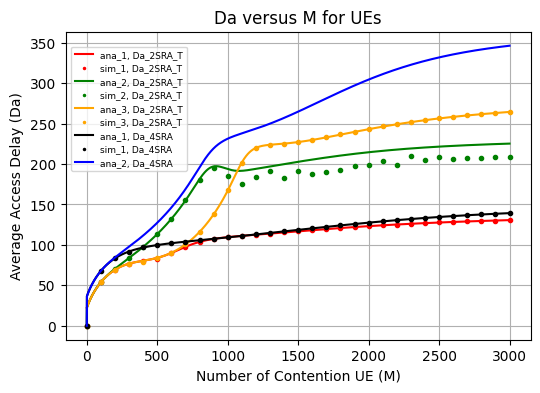

In [ ]:
plt.plot(ana_2SRA_1.M_2SRA, ana_2SRA_1.Da_2SRA_T, '-', color = 'red', label = 'ana_1, Da_2SRA_T')
plt.plot(sim_2SRA_1.M_2SRA, sim_2SRA_1.Da_2SRA_T, 'o', ms = 3, color = 'red', label = 'sim_1, Da_2SRA_T')
plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_2SRA_T, '-', color = 'green', label = 'ana_2, Da_2SRA_T')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_2SRA_T, 'o', ms = 3, color = 'green', label = 'sim_2, Da_2SRA_T')
plt.plot(ana_2SRA_3.M_2SRA, ana_2SRA_3.Da_2SRA_T, '-', color = 'orange', label = 'ana_3, Da_2SRA_T')
plt.plot(sim_2SRA_3.M_2SRA, sim_2SRA_3.Da_2SRA_T, 'o', ms = 3, color = 'orange', label = 'sim_3, Da_2SRA_T')

plt.plot(ana_4SRA_1.M_4SRA, ana_4SRA_1.Da_4SRA, '-', color = 'black', label = 'ana_1, Da_4SRA')
plt.plot(sim_4SRA_1.M_4SRA, sim_4SRA_1.Da_4SRA, 'o', ms = 3, color = 'black', label = 'sim_1, Da_4SRA')
plt.plot(ana_4SRA_2.M_4SRA, ana_4SRA_2.Da_4SRA, '-', color = 'blue', label = 'ana_2, Da_4SRA')

plt.xlabel("Number of Contention UE (M)")
plt.ylabel("Average Access Delay (Da)")
plt.grid(True, which="both")
plt.legend(markerscale=0.5, fontsize=6.5, loc='center right', bbox_to_anchor=(0.27, 0.75))
plt.title('Da versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

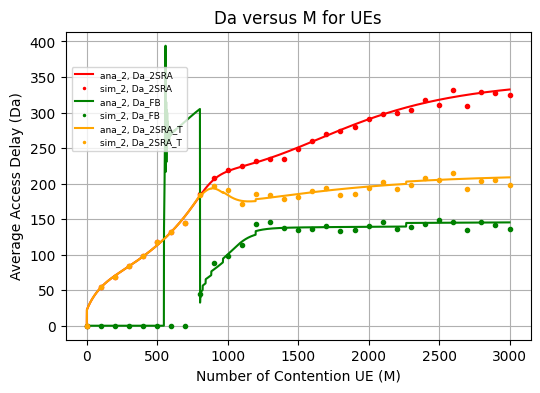

In [20]:
ana_2SRA_2 = pandas.read_csv('ana_testresult_2SRA_2.csv')
sim_2SRA_2 = pandas.read_csv('sim_testresult_2SRA_2.csv')

plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_2SRA, '-', color = 'red', label = 'ana_2, Da_2SRA')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_2SRA, 'o', ms = 3, color = 'red', label = 'sim_2, Da_2SRA')
plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_FB, '-', color = 'green', label = 'ana_2, Da_FB')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_FB, 'o', ms = 3, color = 'green', label = 'sim_2, Da_FB')
plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_2SRA_T, '-', color = 'orange', label = 'ana_2, Da_2SRA_T')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_2SRA_T, 'o', ms = 3, color = 'orange', label = 'sim_2, Da_2SRA_T')

plt.xlabel("Number of Contention UE (M)")
plt.ylabel("Average Access Delay (Da)")
plt.grid(True, which="both")
plt.legend(markerscale=0.5, fontsize=6.5, loc='center right', bbox_to_anchor=(0.27, 0.75))
plt.title('Da versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

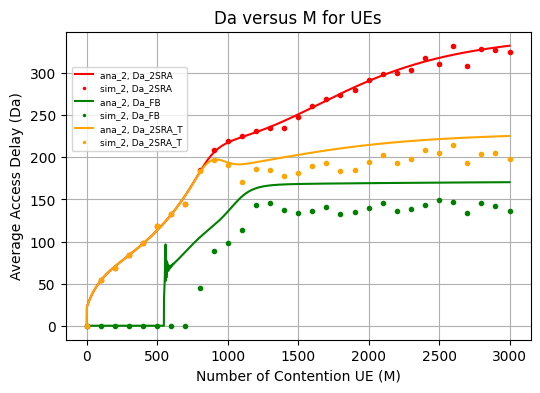

In [24]:
ana_2SRA_2 = pandas.read_csv('ana_testresult_2SRA_2.csv')
sim_2SRA_2 = pandas.read_csv('sim_testresult_2SRA_2.csv')

plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_2SRA, '-', color = 'red', label = 'ana_2, Da_2SRA')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_2SRA, 'o', ms = 3, color = 'red', label = 'sim_2, Da_2SRA')
plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_FB, '-', color = 'green', label = 'ana_2, Da_FB')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_FB, 'o', ms = 3, color = 'green', label = 'sim_2, Da_FB')
plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Da_2SRA_T, '-', color = 'orange', label = 'ana_2, Da_2SRA_T')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Da_2SRA_T, 'o', ms = 3, color = 'orange', label = 'sim_2, Da_2SRA_T')

plt.xlabel("Number of Contention UE (M)")
plt.ylabel("Average Access Delay (Da)")
plt.grid(True, which="both")
plt.legend(markerscale=0.5, fontsize=6.5, loc='center right', bbox_to_anchor=(0.27, 0.75))
plt.title('Da versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

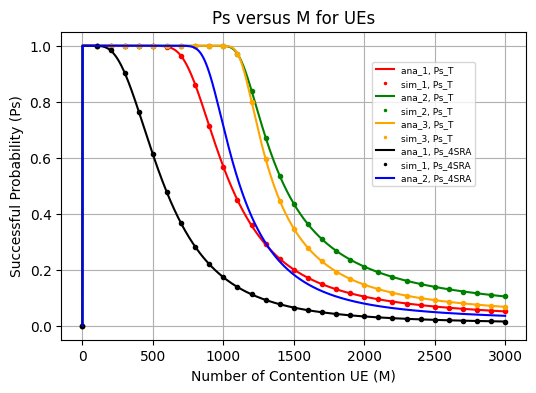

In [15]:
plt.plot(ana_2SRA_1.M_2SRA, ana_2SRA_1.Ps_T, '-', color = 'red', label = 'ana_1, Ps_T')
plt.plot(sim_2SRA_1.M_2SRA, sim_2SRA_1.Ps_T, 'o', ms = 3, color = 'red', label = 'sim_1, Ps_T')
plt.plot(ana_2SRA_2.M_2SRA, ana_2SRA_2.Ps_T, '-', color = 'green', label = 'ana_2, Ps_T')
plt.plot(sim_2SRA_2.M_2SRA, sim_2SRA_2.Ps_T, 'o', ms = 3, color = 'green', label = 'sim_2, Ps_T')
plt.plot(ana_2SRA_3.M_2SRA, ana_2SRA_3.Ps_T, '-', color = 'orange', label = 'ana_3, Ps_T')
plt.plot(sim_2SRA_3.M_2SRA, sim_2SRA_3.Ps_T, 'o', ms = 3, color = 'orange', label = 'sim_3, Ps_T')

plt.plot(ana_4SRA_1.M_4SRA, ana_4SRA_1.Ps_4SRA, '-', color = 'black', label = 'ana_1, Ps_4SRA')
plt.plot(sim_4SRA_1.M_4SRA, sim_4SRA_1.Ps_4SRA, 'o', ms = 3, color = 'black', label = 'sim_1, Ps_4SRA')
plt.plot(ana_4SRA_2.M_4SRA, ana_4SRA_2.Ps_4SRA, '-', color = 'blue', label = 'ana_2, Ps_4SRA')

plt.xlabel("Number of Contention UE (M)")
plt.ylabel("Successful Probability (Ps)")
plt.grid(True, which="both")
plt.legend(markerscale=0.5, fontsize=6.5, loc='center right', bbox_to_anchor=(0.9, 0.7))
plt.title('Ps versus M for UEs')
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()